# TABLE OF CONTENTS

- Importing Libraries
- Loading Data and Preprocessing
- Checking for Null Values in the Dataset
- Basic statistics
- Simple Distribution Plots for all Features
- Pair Plot to Compare All Variables
- Heat Map to Check for Corelation between Features
- Preparing Data
- KMeans Model
- Visualizing Clusters

# Importing Libraries

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.5)

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

# Loading Data and Preprocessing

In [2]:
data=pd.read_csv("wine.data", header = None)
data.head()

0      1     2     3     4    5     6     7     8     9     10    11    12  \
0   1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
1   1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
2   1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
3   1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
4   1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04  2.93   

     13  
0  1065  
1  1050  
2  1185  
3  1480  
4   735

we recover the name of the columns.

In [3]:
data.columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids' , 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
data.head()

Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

# Checking for Null Values in the Dataset

In [5]:
data.isnull().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

We Dont have any Null values

# Basic statistics

In [6]:
data = data.drop(['Class'], axis = 1) #drop target column ('Class')
data.describe()

Alcohol  Malic acid         Ash  Alcalinity of ash   Magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color intensity         Hue  OD280/OD315 of diluted wines      Proline  
count       178.000000  178.000000                    178.000000   178.000000  
mean          5.058090    0.957449                      2.611685   746.893258  
std           2.318286    0.228572                      0.709990   314.907474  
min           1.280000    0.480000                      1.270000   278.000000  
25%           3.220000    0.782500                      1.937500   500.500000  
50%           4.690000    0.965000                      2.780000   673.500000  
75%           6.200000    1.120000                      3.170000   985.000000  
max          13.000000    1.710000                      4.000000  1680.000000

# Simple Distribution Plots for all Features

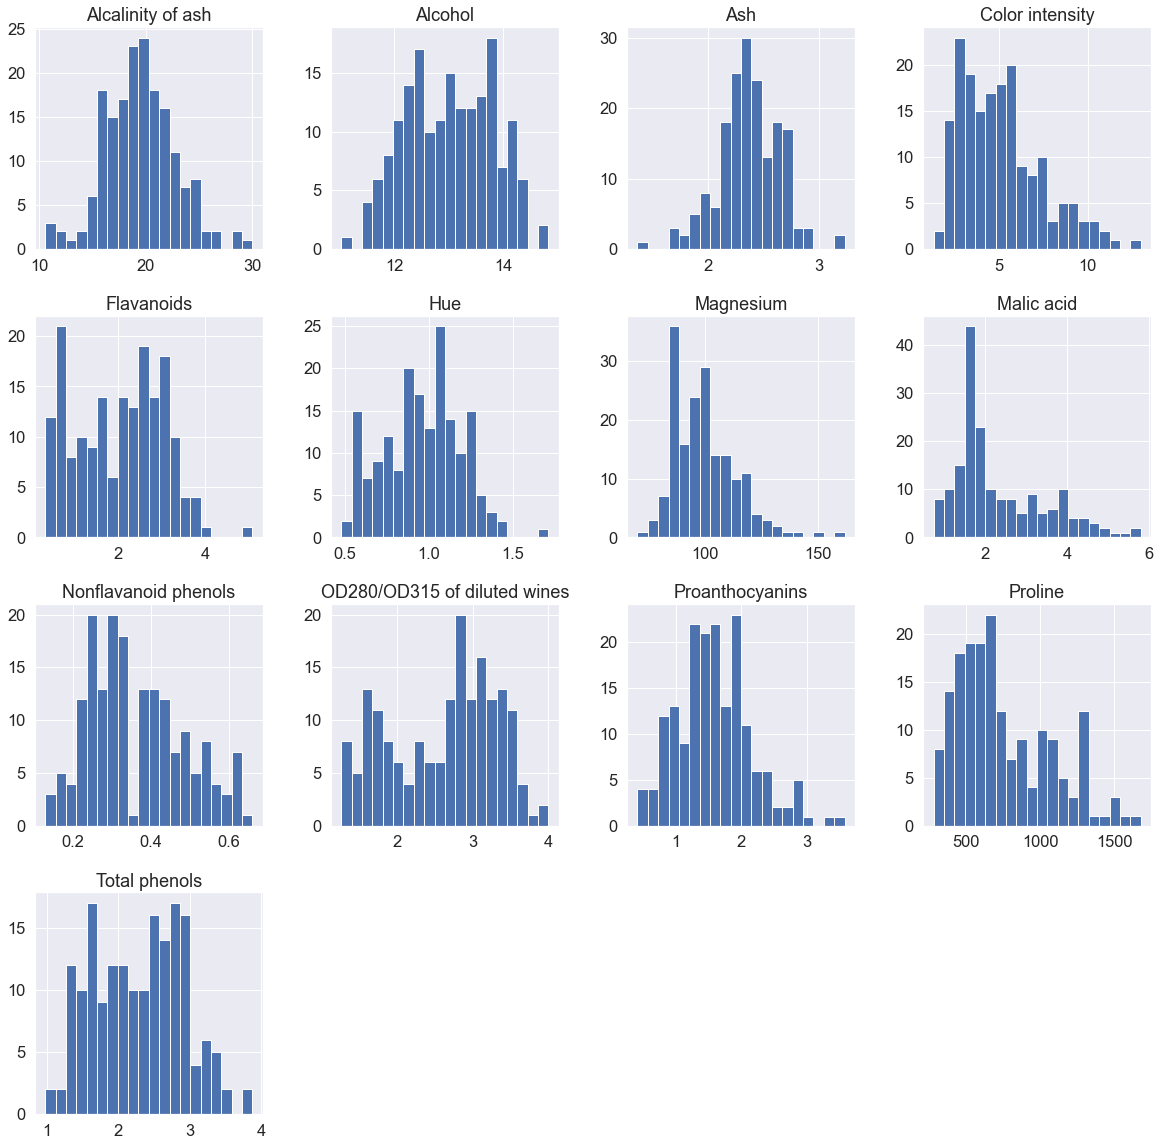

In [7]:
plt.rcParams["figure.figsize"] = (20, 20)
data.hist(bins=20)
plt.show()

# Pair Plot to Compare All Variables

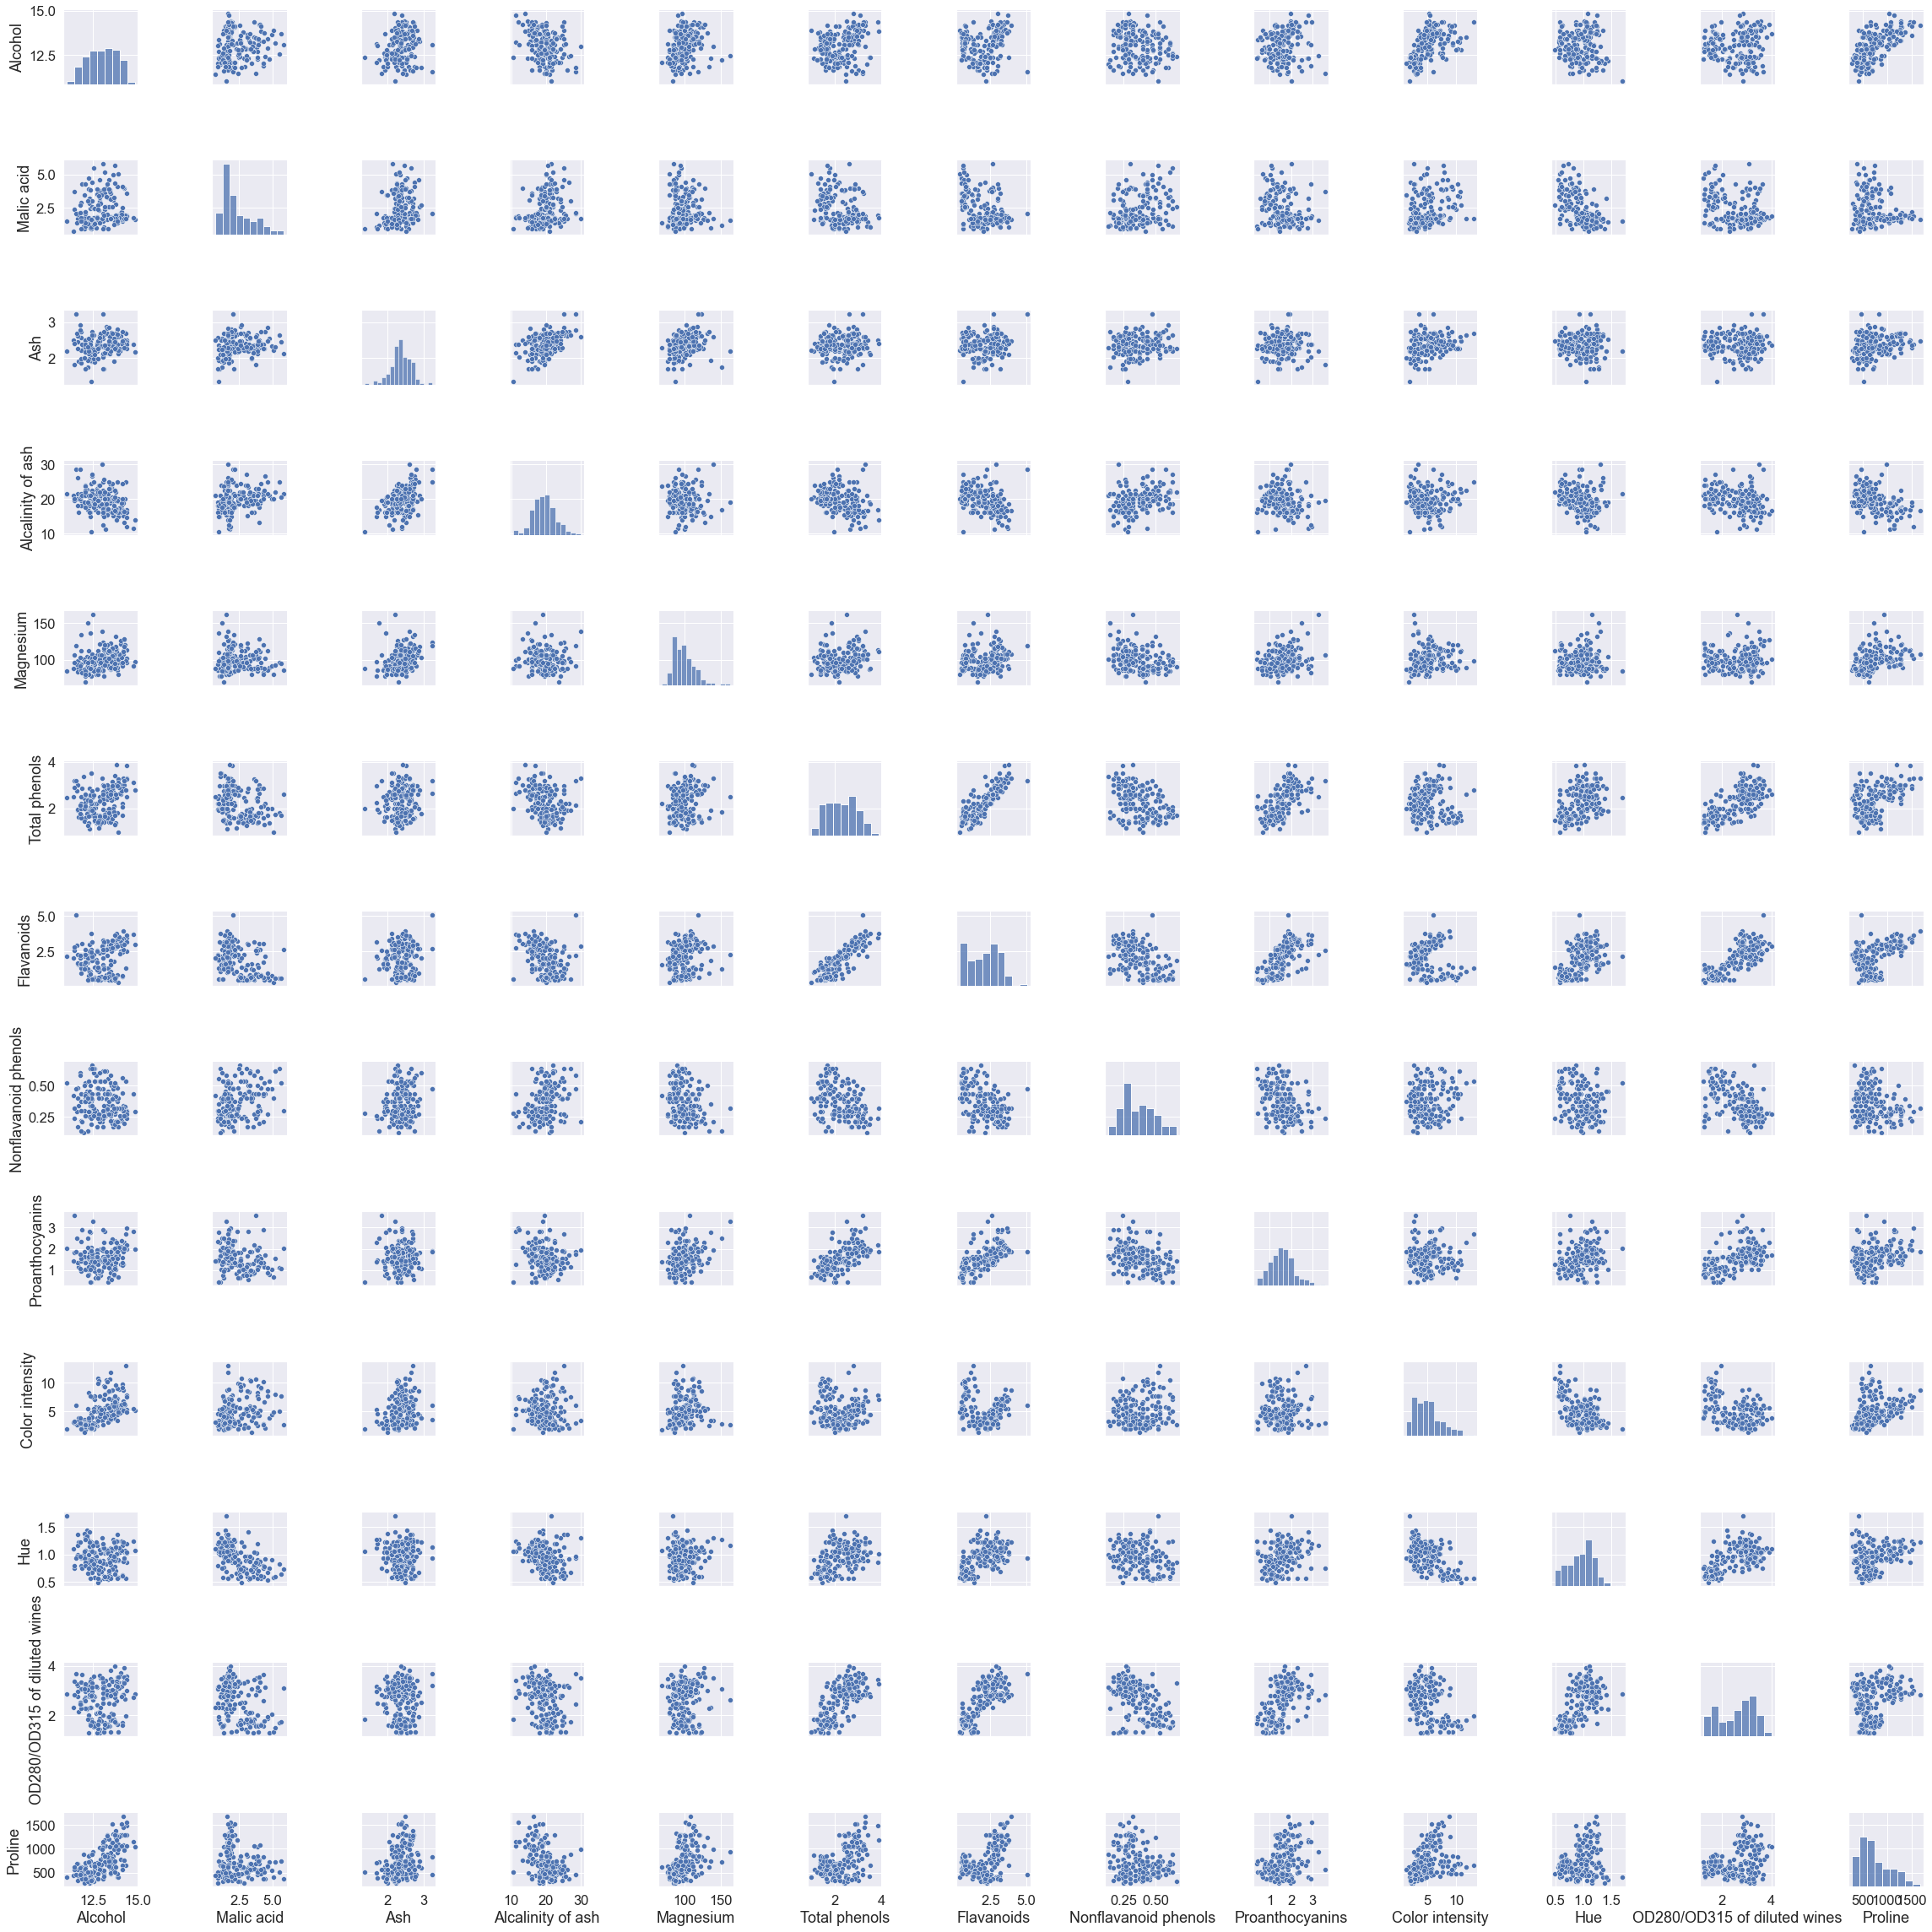

In [8]:
sns.pairplot(data)
plt.show()

There are some Corelation between Features.

# Heat Map to Check for Corelation between Features

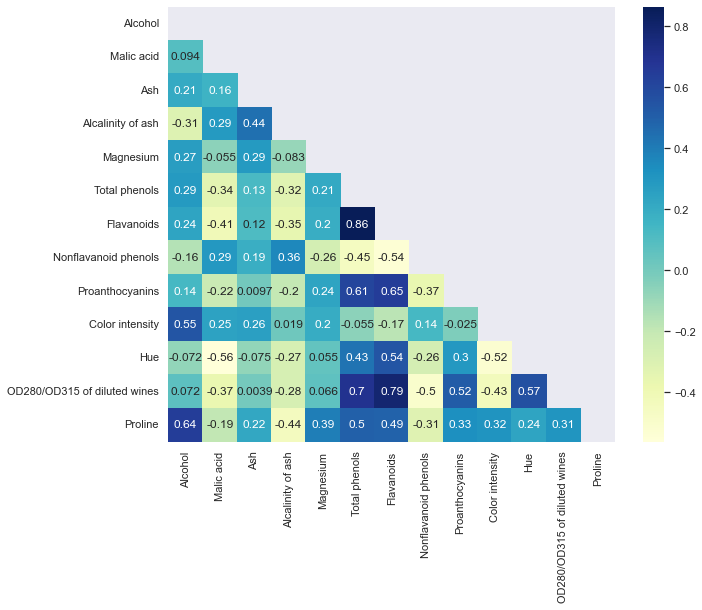

In [9]:
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(data.corr()))
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True, mask=mask);

# Preparing Data

#### Feature Scaling using StandardScaler

In [10]:
sc = StandardScaler()
scaled_data = data.copy()
scaled_data = sc.fit_transform(scaled_data)

#### Applying Principal Component Analysis

In [11]:
# Reducing the Number of Features in the Dataset using PCA
pca = PCA(2)
pca_data = pca.fit_transform(data)

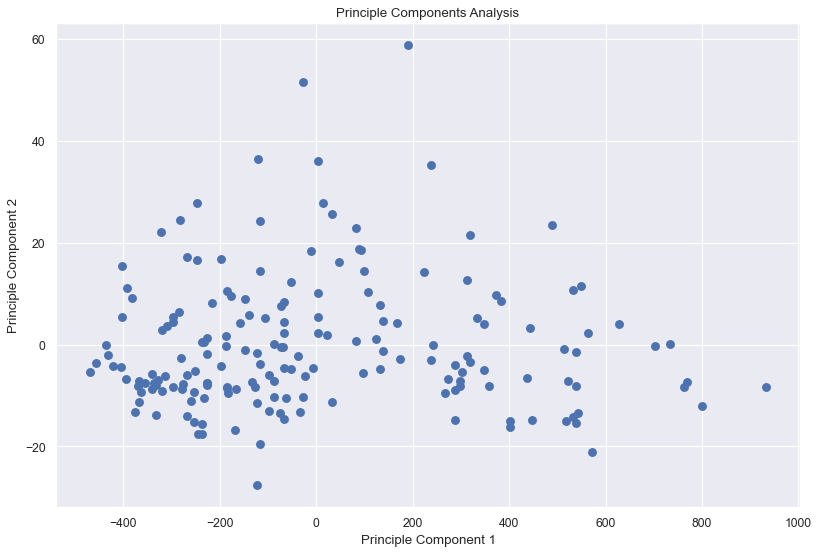

In [12]:
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["figure.dpi"] = 80
plt.scatter(x=pca_data[:,0], y=pca_data[:,1], lw=2)
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.title("Principle Components Analysis")
plt.show()

It can be Observed and Predicted from the above plot that the data has 3 clusters

# KMeans Model

#### Using Elbow Method to Find Appropriate number of clusters

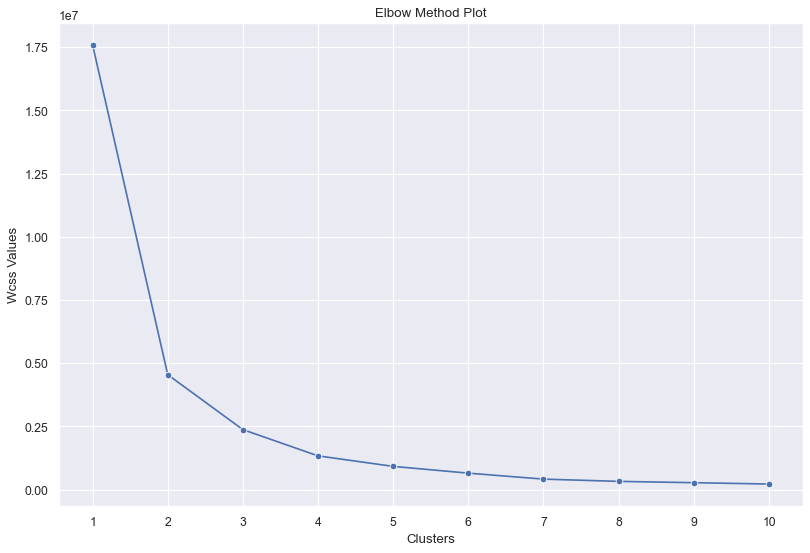

In [13]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(
        n_clusters = i,
        init = 'k-means++',
        random_state=42)
    kmeans.fit(data)
    wcss.append([i, kmeans.inertia_]) # kmeans.inertial_ returns the calculated WCSS Values
    
wcss_dataframe = pd.DataFrame(wcss, columns=["clusters", "wcss value"])

# Plot for Elbow Method
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["figure.dpi"] = 80
sns.lineplot(
    x = wcss_dataframe.clusters.values,
    y = wcss_dataframe["wcss value"], marker="o")
plt.xticks(np.arange(1, 11))
plt.xlabel("Clusters")
plt.ylabel("Wcss Values")
plt.title("Elbow Method Plot")
plt.show()

From Elbow Method it is Clear that we have 3 Clusters

#### Generating Our Dependent Variable using Kmeans

In [14]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = pd.Series(kmeans.fit_predict(data))
y_kmeans

0      1
1      1
2      1
3      1
4      0
      ..
173    0
174    0
175    0
176    0
177    2
Length: 178, dtype: int32

In [15]:
y_kmeans.value_counts()

2    69
0    62
1    47
dtype: int64

#### Centeroids

In [16]:
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

# Visualizing Clusters

In [17]:
pca_dataframe = pd.DataFrame(pca_data, columns=["PCA 1", "PCA 2"])
pca_dataframe["Cluster"] = y_kmeans
pca_dataframe.sample(10)

PCA 1      PCA 2  Cluster
94  -401.851274   5.331400        2
19    98.403177  14.392659        0
121 -281.534569  24.508261        2
9    298.049553  -7.101543        1
175   88.458074  18.776285        0
161  -66.755431   8.470290        0
99  -341.040900  -5.750566        2
51   517.928963 -14.997555        1
153  -71.897659  -0.399656        0
27   537.919165 -15.388346        1

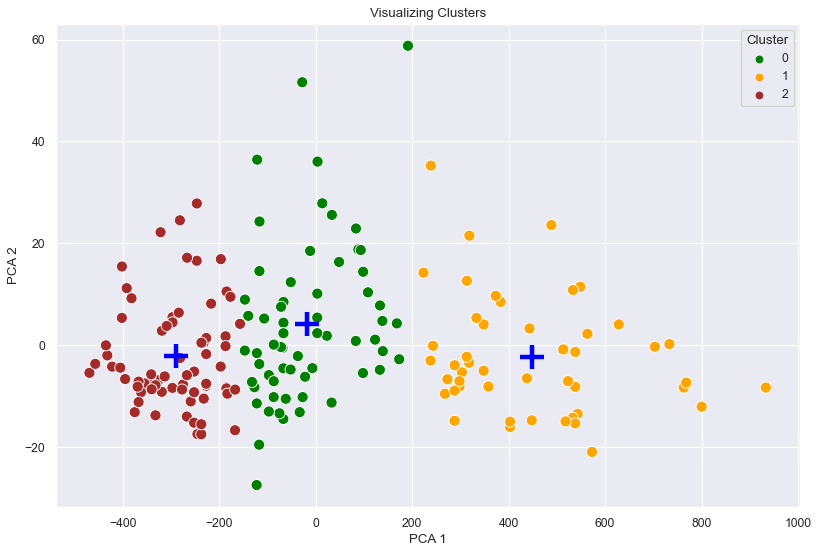

In [18]:
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["figure.dpi"] = 80
sns.scatterplot(x="PCA 1", y="PCA 2", hue="Cluster", data=pca_dataframe, palette=['green','orange','brown'], s=100)
plt.scatter(x=centroids_pca[:, 0], y=centroids_pca[:, 1], marker="+", s=500, linewidths=3, lw=4, color="blue", zorder=10)
plt.title("Visualizing Clusters")
plt.show()

In [19]:
data["Cluster"] = y_kmeans
data.head()

Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0    14.23        1.71  2.43               15.6        127           2.80   
1    13.20        1.78  2.14               11.2        100           2.65   
2    13.16        2.36  2.67               18.6        101           2.80   
3    14.37        1.95  2.50               16.8        113           3.85   
4    13.24        2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280/OD315 of diluted wines  Proline  Cluster  
0                          3.92     1065        1  
1                          3.40     1050        1  
2                          3.17     1185        1  
3                          3.45     1480        1  
4                          2.93      735        0

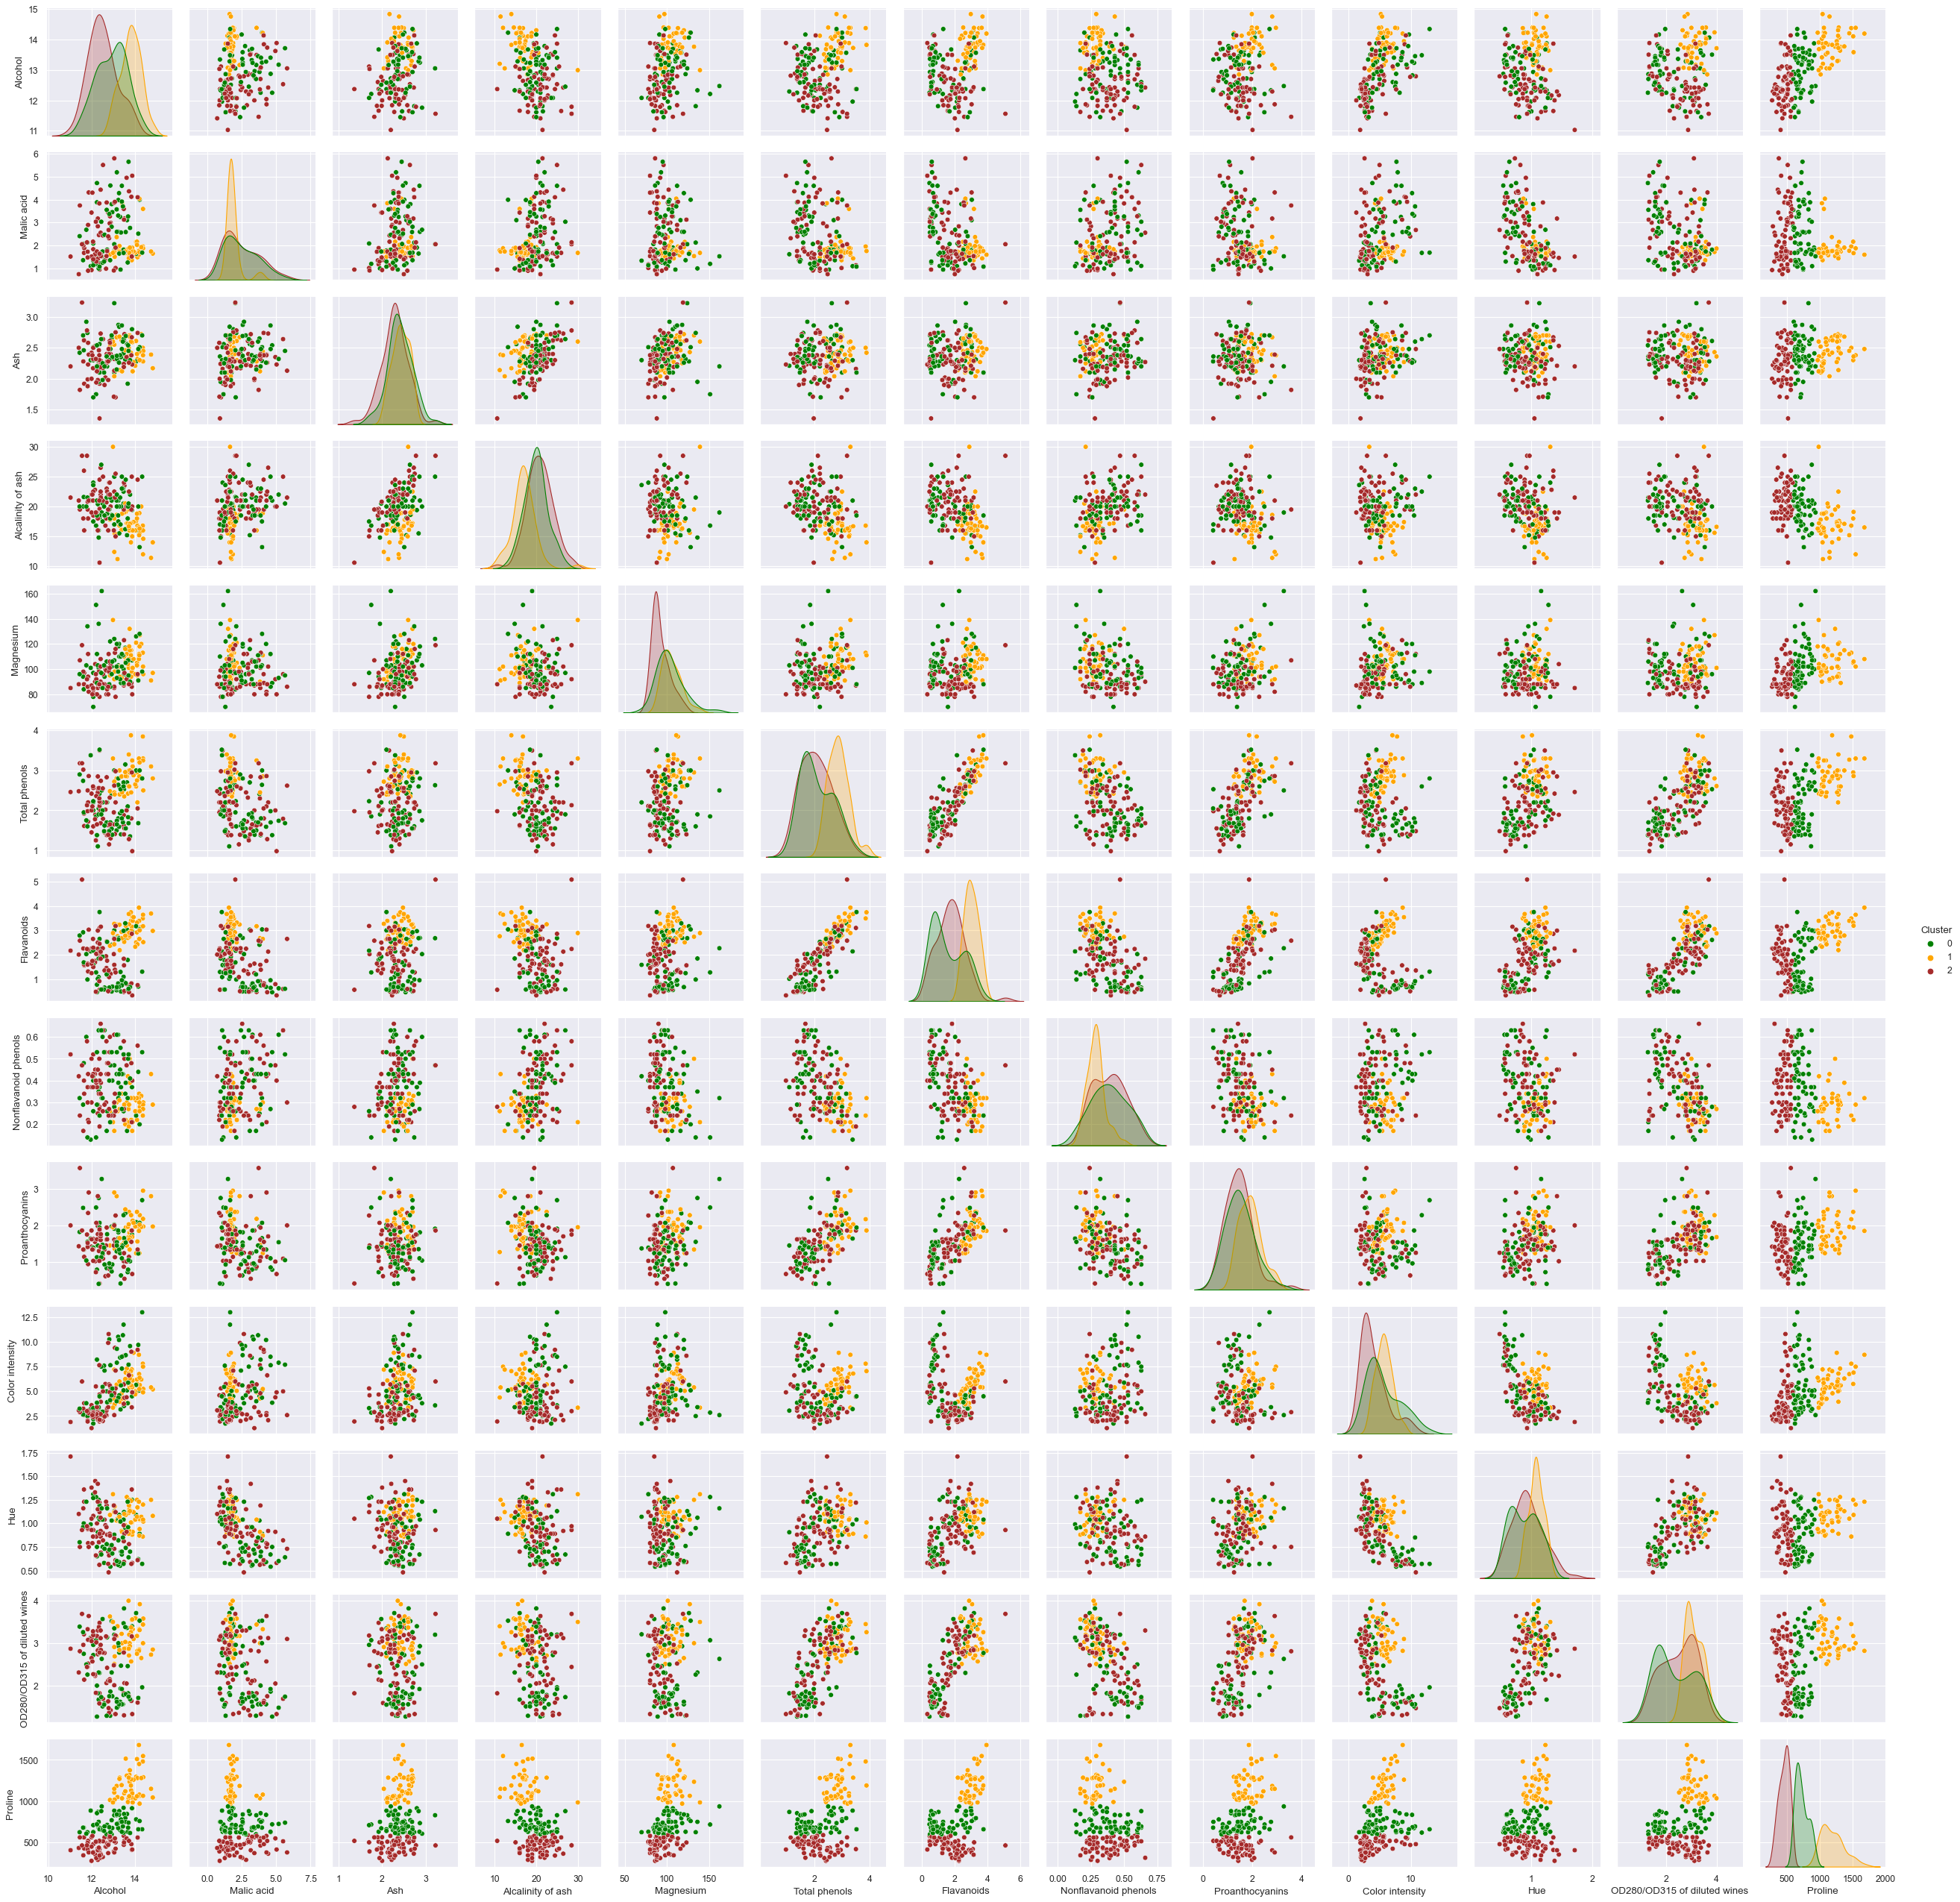

In [20]:
sns.pairplot(data, hue="Cluster", palette=['green','orange','brown'])
plt.show()